Survived (no = 0 , yes = 1)

In [27]:
import warnings
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [28]:
warnings.filterwarnings('ignore',category=pd.errors.SettingWithCopyWarning)

&nbsp;

## Analise dos dados

In [29]:
gender  = pd.read_csv(r'exercicios/titanic/gender_submission.csv') 
train   = pd.read_csv(r'exercicios/titanic/train.csv')
test    = pd.read_csv(r'exercicios/titanic/test.csv')

test    = test.merge(
    right = gender,
    how   = 'inner',
    on    = 'PassengerId'
)

data  = pd.concat([train,test],axis=0)

In [30]:
data['Embarked'].loc[data['Embarked']=='C'] = 'Cherbourg'
data['Embarked'].loc[data['Embarked']=='Q'] = 'Queenstown'
data['Embarked'].loc[data['Embarked']=='S'] = 'Southampton' 

In [31]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [33]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [34]:
data.isna().nunique()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            2
SibSp          1
Parch          1
Ticket         1
Fare           2
Cabin          2
Embarked       2
dtype: int64

> Atributos `age` , `Fare` , `Cabin` , `Embarked` possuem atributos nulos
* **Imputar dados :**
    1. Para os atributos numericos binario irei fazer uma imputação com o interative imputer 
    2. Para os atributos numericos continuos irei fazer um imputação com simplesimputer com base na média

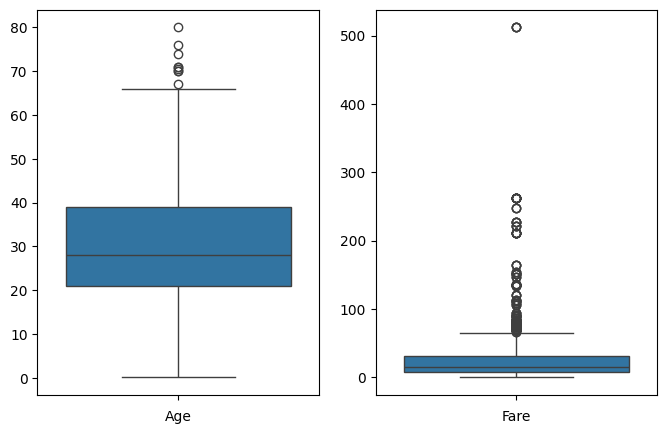

In [35]:
dataBox = data.select_dtypes(include=['float64'])
fig , ax = plt.subplots(1,2,figsize=(8,5))

for coluna,axis in zip(dataBox.columns,ax.flatten()): 
    sea.boxplot(dataBox[coluna],ax=axis)
    axis.set_xlabel(coluna)
    axis.set_ylabel('')
plt.show()

> Possui outliers , contudo , irei verificar quando for classificar se e necessário remover esse atributos

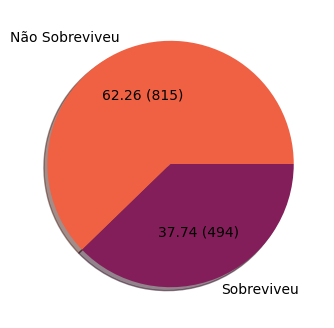

In [36]:
pizza = data['Survived'].value_counts()
color = sea.color_palette('rocket_r',n_colors=2)
plt.figure(figsize=(6,4))
plt.pie( x = pizza.values , labels = ['Não Sobreviveu','Sobreviveu'] , autopct = lambda x: '{:.2f} ({:.0f})'.format(x,(sum(pizza.values)*x)/100),colors=color,shadow=True)
plt.show()

> Classes estão desbalanceadas. Para a classificação se faz necessário o balanceamento (estrategia sea o undersampling)

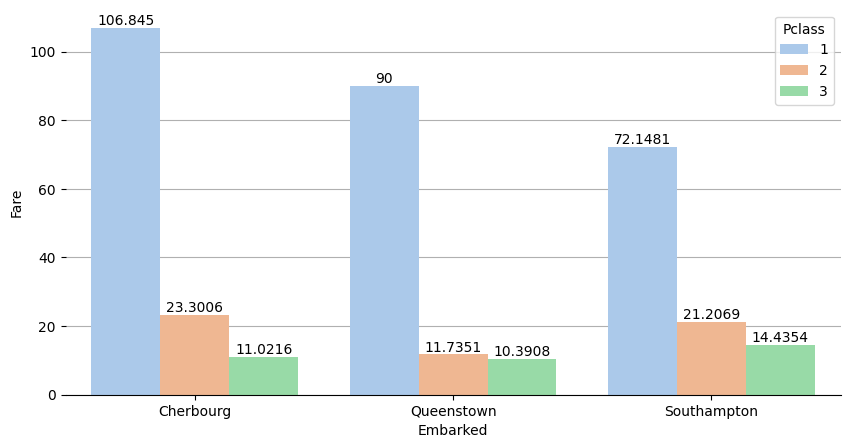

In [37]:
barData = data.groupby(by=['Pclass','Embarked'])['Fare'].mean().reset_index()

color = sea.color_palette('pastel',n_colors=3)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['Fare'] , hue=barData['Pclass'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
bar.bar_label(bar.containers[2])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

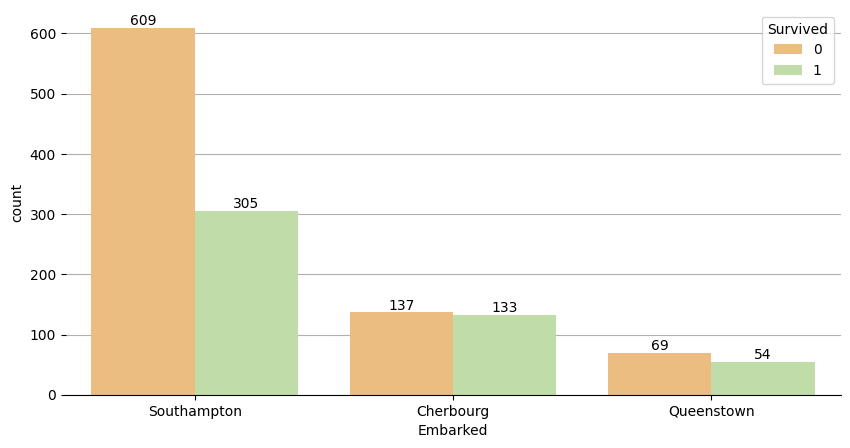

In [38]:
barData = data.groupby(by=['Survived'])['Embarked'].value_counts().reset_index()

color = sea.color_palette('Spectral',n_colors=2)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['count'] , hue=barData['Survived'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

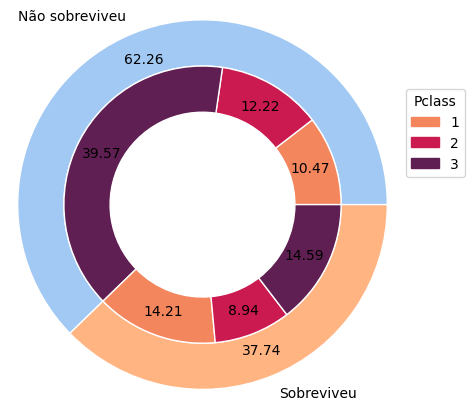

In [39]:
pizza = data.groupby(by=['Survived'])['Pclass'].value_counts().reset_index().sort_values(by='Pclass')

fig, ax = plt.subplots(1,1)
fig.set_figwidth(14)
fig.set_figheight(5)
colors1 = sea.color_palette('pastel')[0:2] 
colors2H = sea.color_palette('rocket_r',n_colors=3) 


ax.pie(x = pizza.groupby(by=['Survived'])['count'].sum(), labels= ['Não sobreviveu','Sobreviveu'] ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax.pie(x = pizza.groupby(by=['Survived','Pclass'])['count'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2H )

legends = []
for value, color in zip(pizza['Pclass'].drop_duplicates().values, colors2H): 
       legends.append(mpatches.Patch(color=color, label=value))
ax.legend(title='Pclass'    ,handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))

plt.show()

In [40]:
data.groupby(by=['Pclass','Embarked','Sex'])['Age'].mean()

Pclass  Embarked     Sex   
1       Cherbourg    female    38.107692
                     male      40.047619
        Queenstown   female    35.000000
                     male      44.000000
        Southampton  female    35.609375
                     male      41.705977
2       Cherbourg    female    19.363636
                     male      27.269231
        Queenstown   female    30.000000
                     male      53.750000
        Southampton  female    28.455165
                     male      30.491702
3       Cherbourg    female    16.818182
                     male      24.129474
        Queenstown   female    24.333333
                     male      26.738095
        Southampton  female    22.854771
                     male      26.146241
Name: Age, dtype: float64

In [41]:
data['Cabin'].nunique()

186

&nbsp;

## Pré - processamento

In [55]:
from sklearn.experimental   import enable_iterative_imputer
from sklearn.impute         import SimpleImputer,IterativeImputer
from sklearn.linear_model   import LinearRegression
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.base           import BaseEstimator,TransformerMixin,RegressorMixin
from sklearn.preprocessing  import LabelBinarizer,OneHotEncoder

In [56]:
dataset = data.copy()

Removendo colunas que não serao usadas

In [57]:
class RemovendoColunas(BaseEstimator,TransformerMixin):
    def __init__(self,colunas = None) -> None:
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if ( self.columns == None) :
            return X
        return X.drop(columns = self.columns )

> Será removido os atributos `Name` ,`PassengerId`, `Ticket` 

In [58]:
dataset = RemovendoColunas(['Name' ,'PassengerId', 'Ticket']).fit_transform(dataset)

In [59]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,C123,Southampton
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,Southampton
414,1,1,female,39.0,0,0,108.9000,C105,Cherbourg
415,0,3,male,38.5,0,0,7.2500,NaN,Southampton
416,0,3,male,NaN,0,0,8.0500,NaN,Southampton


#### Transformando os atributos

In [60]:
classesGender = LabelBinarizer()
dataset['Sex'] = classesGender.fit_transform(dataset['Sex'])

#### Imputando dados dos atributos

In [61]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,Southampton
1,1,1,0,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,0,26.0,0,0,7.9250,NaN,Southampton
3,1,1,0,35.0,1,0,53.1000,C123,Southampton
4,0,3,1,35.0,0,0,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...
413,0,3,1,NaN,0,0,8.0500,NaN,Southampton
414,1,1,0,39.0,0,0,108.9000,C105,Cherbourg
415,0,3,1,38.5,0,0,7.2500,NaN,Southampton
416,0,3,1,NaN,0,0,8.0500,NaN,Southampton


In [79]:
x = OneHotEncoder()
x.fit_transform(dataset['Embarked'])

ValueError: Expected 2D array, got 1D array instead:
array=['Southampton' 'Cherbourg' 'Southampton' ... 'Southampton' 'Southampton'
 'Cherbourg'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
index = dataset.isna().index

In [51]:
def Imputando(dataset):
    estimador = IterativeImputer(LinearRegression(),random_state=42)
    return estimador.fit_transform(dataset)

In [52]:
Imputando(dataset)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'